In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import numpy as np
from sklearn.linear_model import LinearRegression
from arch.unitroot import ADF
import seaborn as sns

In [3]:
mt5.initialize()

True

In [4]:
symbols = ['GBPUSD','GBPJPY']

In [5]:
df = pd.DataFrame()

In [6]:
for i in symbols:
    rates = mt5.copy_rates_from_pos(i, mt5.TIMEFRAME_D1, 0, 250)
    df[i] = [y[4] for y in rates]

In [7]:
df

,GBPUSD,GBPJPY
0,1.21425,129.043
1,1.21346,128.717
2,1.20255,127.010
3,1.20747,127.141
4,1.20597,128.727
...,...,...
245,1.25665,134.498
246,1.26612,135.820
247,1.27330,135.979
248,1.27352,136.477


In [8]:
rets = df.pct_change()
corr = rets.corr()
corr

,GBPUSD,GBPJPY
GBPUSD,1.000000,0.680227
GBPJPY,0.680227,1.000000


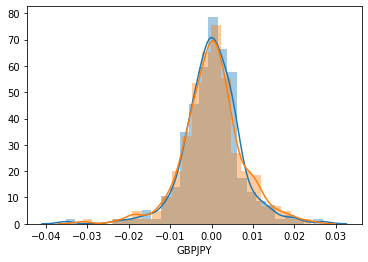

In [9]:
sns.distplot(rets.GBPUSD)
sns.distplot(rets.GBPJPY)

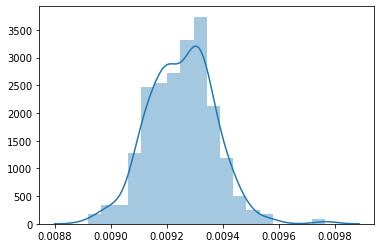

In [10]:
sns.distplot(df.GBPUSD/df.GBPJPY)

In [11]:
X = df[['GBPUSD']]
y = df[['GBPJPY']]

In [12]:
reg = LinearRegression().fit(X, y)

reg.coef_

array([[128.81872313]])

In [13]:
type(reg.intercept_[0])

numpy.float64

In [14]:
previsao = reg.predict(X)

In [15]:
residuos = y - previsao

In [16]:
exemplo = pd.DataFrame()

exemplo['GBPUSD'] = X['GBPUSD'].loc[[249]]
exemplo['GBPJPY'] = y['GBPJPY'].loc[[249]]
exemplo['desviopadrao'] = residuos['GBPJPY'].std()
exemplo['coeficiente'] = reg.coef_[0]
exemplo['intercept_'] = reg.intercept_[0]
exemplo

,GBPUSD,GBPJPY,desviopadrao,coeficiente,intercept_
249,1.27362,136.014,1.559384,128.818723,-26.136794


## Teste Dickey-Fuller

In [17]:
adf = ADF(residuos)

In [18]:
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.023
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [19]:
exemplo['nivel_confianca'] = 100 - adf.pvalue
exemplo['dick_fuller'] = adf.stat
exemplo.to_csv("exemplo.csv", header=True)

In [20]:
exemplo

,GBPUSD,GBPJPY,desviopadrao,coeficiente,intercept_,nivel_confianca,dick_fuller
249,1.27362,136.014,1.559384,128.818723,-26.136794,100.0,-6.022689
